In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Karnataka1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,20,0,0,0,18,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,18,0,0,0,0,0,0,0
131397,2014,12,31,21,0,19,0,0,0,18,0,0,0,0,0,0,0
131398,2014,12,31,22,0,19,0,0,0,18,0,0,0,0,0,0,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110,2000-01-01 02:00:00
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343,2000-01-01 03:00:00
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554,2000-01-01 04:00:00
5,2000,1,1,5,0,23,153,821,718,14,153,129,821,859,0,718,721,2000-01-01 05:00:00
6,2000,1,1,6,0,24,162,856,822,14,162,160,856,861,0,822,825,2000-01-01 06:00:00
7,2000,1,1,7,0,25,164,863,852,14,258,258,677,677,0,798,798,2000-01-01 07:00:00
8,2000,1,1,8,0,25,160,847,804,14,192,192,769,769,0,777,777,2000-01-01 08:00:00
9,2000,1,1,9,0,25,150,803,685,15,150,147,803,819,0,685,693,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2014-12-27,217.0
2014-12-28,161.8
2014-12-29,183.2


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,248.012903
2000-02-29,259.960714
2000-03-31,307.954839
2000-04-30,288.273333
2000-05-31,263.703226
...,...
2014-08-31,236.287097
2014-09-30,230.240000
2014-10-31,205.729032


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,248.012903
2000-02-29,259.960714
2000-03-31,307.954839
2000-04-30,288.273333
2000-05-31,263.703226
...,...
2011-08-31,227.535484
2011-09-30,234.500000
2011-10-31,192.458065


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2011-12-27,175.3
2011-12-28,224.1
2011-12-29,216.1


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([231.1, 235.1, 228.3, 234. , 235.3, 236.4, 240.4, 241.4, 242. ,
       240.4, 207. , 205.5, 230.7, 241.7, 240.1, 247.5, 253.5, 252.9,
       258.3, 259.2, 263.2, 262.5, 259.4, 262.5, 266.9, 264.9, 264.6,
       266.1, 269.1, 276.9, 271.5]),
       array([293.7, 286.6, 289.9, 286.9, 287.4, 279.8, 297.5, 278.4, 229. ,
       285.8, 261.1, 236.1, 240.8, 299.1, 305.1, 295.8, 304.8, 306.1,
       312. , 312.9, 289.4, 230.6, 186.1,  98.7, 228.7, 100.9, 239.9,
       215.8]),
       array([297.7, 298.3, 302.7, 307.5, 306.3, 307.7, 310.9, 306.2, 309. ,
       307.9, 289.8, 291.5, 312.4, 310.6, 313.8, 313.9, 304. , 315.7,
       301.3, 307.9, 311.9, 316.5, 320.3, 317.3, 315.5, 316.3, 294.3,
       284.8, 316.5, 316.3, 321.8]),
       array([291.6, 297.1, 292.6, 299.7, 296.7, 307.3, 246.8, 301.8, 303.5,
       263.4, 272.3, 222.3, 299.7, 302.1, 296. , 281.8, 289.3, 267.9,
       292. , 296.6, 294.3, 297. , 284.2, 264.6, 302.5, 301. , 300.9,
       297.9, 296.8, 288.5]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_2=foo_1.reshape(12,31,1)
foo_2.shape

(12, 31, 1)

In [18]:
Y_T[j:144:12]

array([229.85806452, 230.16774194, 228.1       , 221.79677419,
       228.2516129 , 232.11612903, 227.04193548, 229.61290323,
       227.        , 227.53548387])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(i,1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  foo_1=foo_1.reshape(12,i,1)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape(1,datesInYr[i%12],1)
  #print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[255.54324]]
[[260.42862]]
[[321.67706]]
[[261.08603]]
[[268.61908]]
[[244.43369]]
[[237.8553]]
[[241.15652]]
[[256.99466]]
[[191.96411]]
[[356.25656]]
[[183.3343]]
[[252.38577]]
[[314.91434]]
[[258.71194]]
[[331.85764]]
[[276.83582]]
[[235.82773]]
[[229.87935]]
[[228.90666]]
[[315.80438]]
[[203.76448]]
[[187.61722]]
[[231.4683]]
[[243.91124]]
[[299.78473]]
[[144.721]]
[[279.1811]]
[[269.89893]]
[[261.174]]
[[231.18323]]
[[229.60077]]
[[269.7221]]
[[205.31316]]
[[154.08511]]
[[176.08168]]


[array([[255.54324]], dtype=float32),
 array([[260.42862]], dtype=float32),
 array([[321.67706]], dtype=float32),
 array([[261.08603]], dtype=float32),
 array([[268.61908]], dtype=float32),
 array([[244.43369]], dtype=float32),
 array([[237.8553]], dtype=float32),
 array([[241.15652]], dtype=float32),
 array([[256.99466]], dtype=float32),
 array([[191.96411]], dtype=float32),
 array([[356.25656]], dtype=float32),
 array([[183.3343]], dtype=float32),
 array([[252.38577]], dtype=float32),
 array([[314.91434]], dtype=float32),
 array([[258.71194]], dtype=float32),
 array([[331.85764]], dtype=float32),
 array([[276.83582]], dtype=float32),
 array([[235.82773]], dtype=float32),
 array([[229.87935]], dtype=float32),
 array([[228.90666]], dtype=float32),
 array([[315.80438]], dtype=float32),
 array([[203.76448]], dtype=float32),
 array([[187.61722]], dtype=float32),
 array([[231.4683]], dtype=float32),
 array([[243.91124]], dtype=float32),
 array([[299.78473]], dtype=float32),
 array([[144.72

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
y_w[144:]


,GHI
Date,
2012-01-31,248.967742
2012-02-29,281.160714
2012-03-31,291.019355
2012-04-30,274.733333
2012-05-31,261.964516
2012-06-30,250.993333
2012-07-31,229.519355
2012-08-31,233.245161
2012-09-30,234.136667


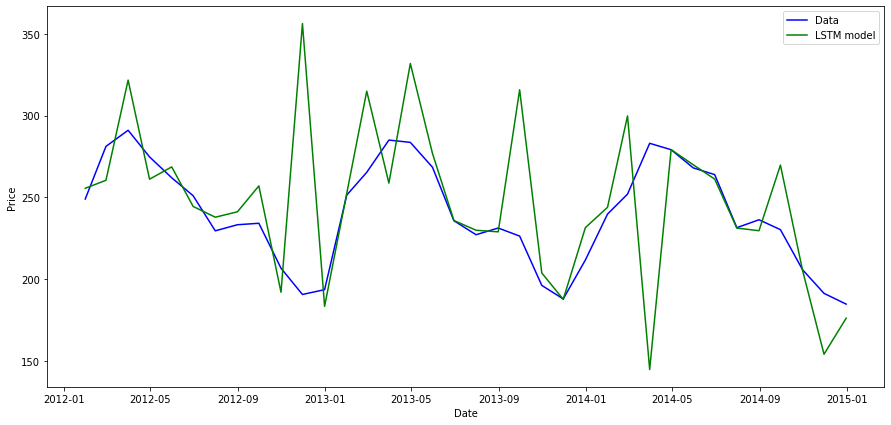

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'Data')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'green', label= 'LSTM model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

43.665073438970765

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.10171922063295279